In [1]:
import pandas as pd

In [2]:
enron1 = pd.read_csv('./csv/enron1.csv')

In [3]:
import sys
sys.path.append('../Handlers')
from traintest import ClassificationModel, model_parameters
from preprocessing import EnronPreprocess, lemmatizing, vectorizing

[nltk_data] Downloading package punkt to E:/nltk...
[nltk_data]   Package punkt is already up-to-date!


In [4]:
enron1_preprocess = EnronPreprocess(enron1, "enron1")
enron1_preprocessed_X, enron1_preprocessed_y = enron1_preprocess.preprocess_data()

In [5]:
enron1_preprocessed_X = enron1_preprocessed_X.apply(lemmatizing)

In [ ]:
enron1_preprocessed_countvec_X = vectorizing(enron1_preprocessed_X, "countvectorizer")
del enron1_preprocessed_X

In [7]:
from sklearn.svm import SVC

svm = SVC()

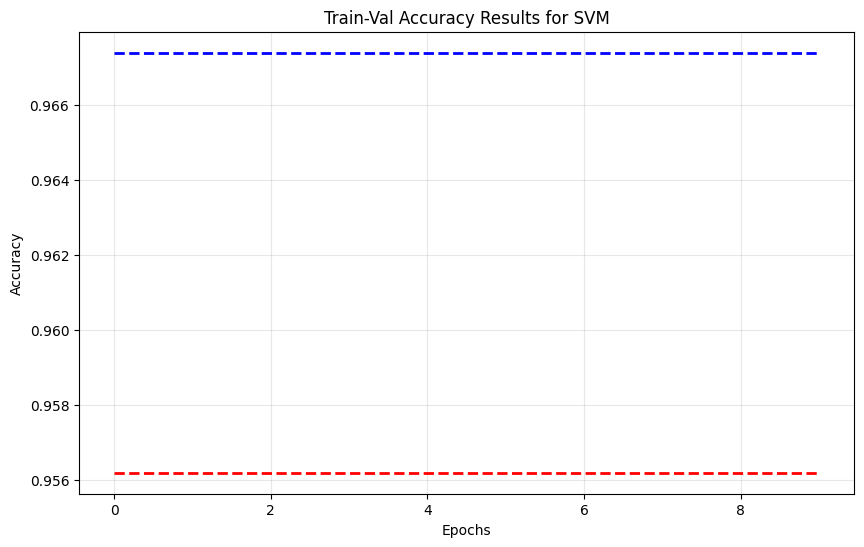

In [9]:
%reload_ext autoreload
%autoreload 2

import sys
sys.path.append('../Handlers')
import traintest

svm_model = traintest.ClassificationModel(svm, 'enron1')
svm_model.train_with_epochs(enron1_preprocessed_countvec_X, enron1_preprocessed_y, test_size=0.15, valid_size=0.15)
svm_model.plot_train_val_accuracy_after_epochs(xlabel="Epochs", ylabel="Accuracy")

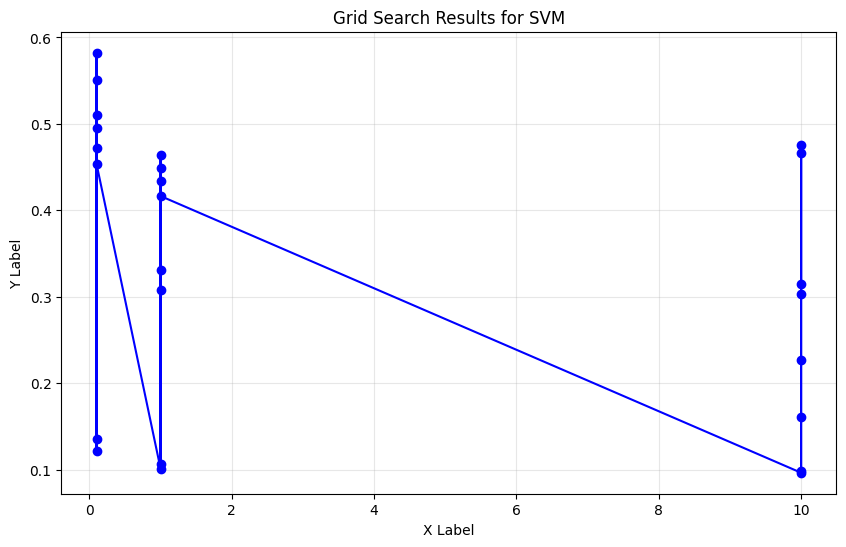

In [ ]:
svm_model.plot_grid("param_C", "mean_score_time")

In [ ]:
import joblib
model = joblib.load('models/grid/SVM_enron1_grid.joblib')
model.best_params_

{'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}